In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.seasonal as smts
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [130]:
#Data
waste = pd.read_csv("/Users/marcb/Documents/Projects/WDL/Stage I - data/Waste_Collection___Diversion_Report__daily_.csv")

waste['Load Time'] = pd.to_datetime(waste['Load Time'], format='%m/%d/%Y %H:%M:%S %p')

waste['Month'] = waste['Load Time'].dt.month
waste['Year'] = waste['Load Time'].dt.year
waste['Date'] = waste['Load Time'].dt.date

waste = waste.set_index(waste['Load Time'])

waste = waste.dropna()

population = pd.read_csv("/Users/marcb/Documents/Projects/WDL/Stage I - data/population.csv", delimiter=";", decimal=",")

pop2021 = {'Year': 2021, 'Total area population': 937397, 'Annualized growth rate': 1.2}
population = population.append(pop2021, ignore_index=True)

popuation = population.dropna()

# Old Commands, dont know if needed again

In [131]:
## Can We create something that loops over all Load Types and removes outliers ?

#remove outliers
for x in ['Load Weight']:
    q75,q25 = np.percentile(garbage_collections.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    garbage_collections.loc[garbage_collections[x] < min,x] = np.nan
    garbage_collections.loc[garbage_collections[x] > max,x] = np.nan

NameError: name 'garbage_collections' is not defined

In [ ]:
a =[]
for i in waste['Load Type']:
    if i not in a:
        a.append(i)

In [ ]:
b = []
for i in a:
    x = waste[waste['Load Type'] == i]
    b.append([i, np.mean(x['Load Weight']), len(x['Load Weight'])])

b

# Using all Load Types and merging it with population

I)  In the first step, we were slicing the data from '2006-01-01' to '2021-06-30' because we saw that the data   
    before 2006 was inconsistent. The July 2021 is also excluded, because in this month, only the first 11 days 
    were given. 

II) Following up, we merged the waste data of Austin (Texas) with the data on population growth. 

III) We were relying on the population growth data to calculate the amount of waste produced per person. 


In [ ]:
# I) Slice time horizon
waste = waste.loc['2006-01-01': '2021-06-30']

In [ ]:
# II) Merge
m_waste = waste.merge(population, on='Year', how='left', indicator=True)

In [ ]:
# III) Transform and create per-person waste production
m_waste['Load Time'] = pd.to_datetime(m_waste['Load Time'], format='%m/%d/%Y %H:%M:%S %p')
m_waste = m_waste.set_index(m_waste['Load Time'])
m_waste['Load Weight pp'] = m_waste['Load Weight'] / m_waste['Total area population']

# Descriptive analysis daily data

The aim of this Chapter is to gain a general perspective on the daily data.

I) Decomposing of the daily data using a weekly season

   The decomposition of the time series has shown some strange outliers of the residuals. The 

II) ACF


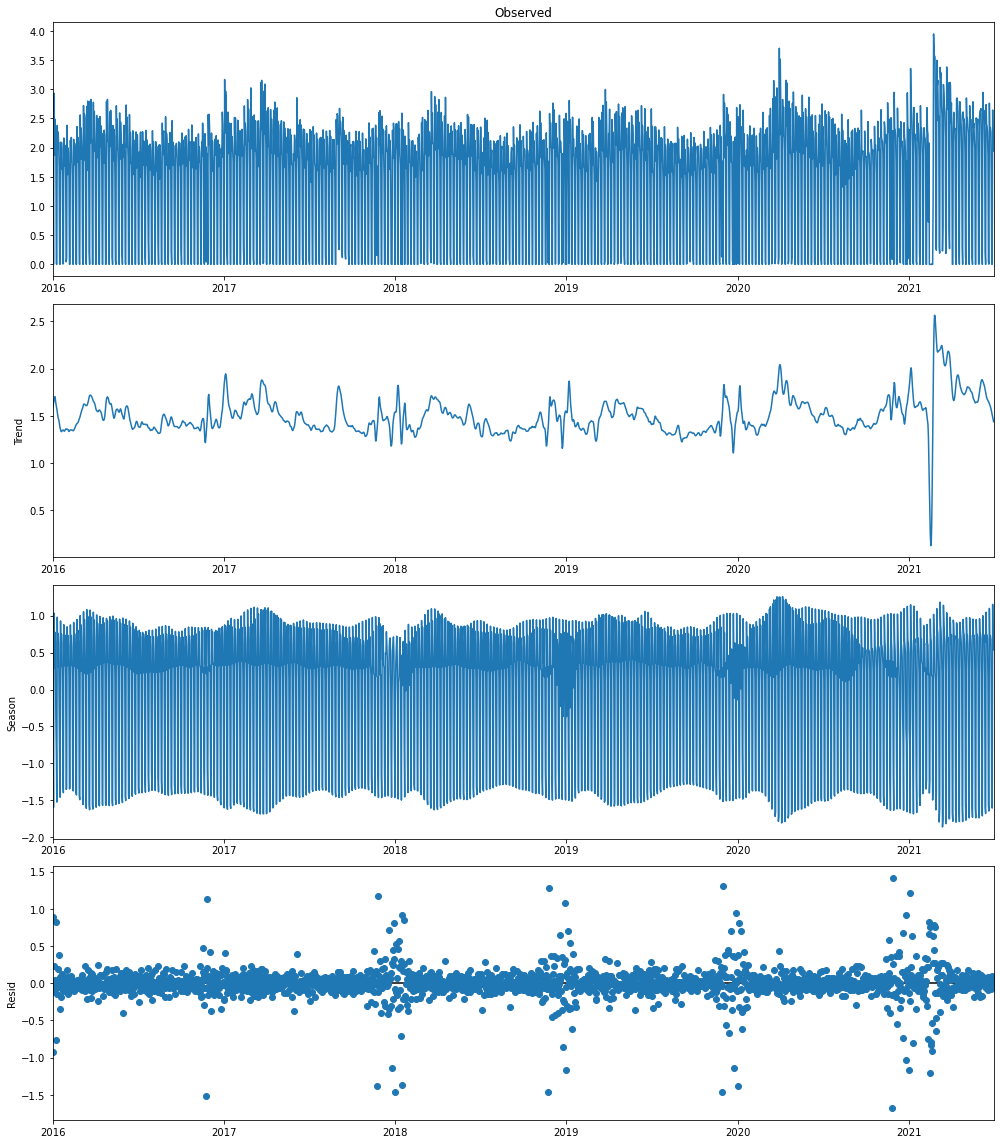

In [174]:
#Decomposing daily data

pp_daily_waste = m_waste['Load Weight pp'].resample('d').agg(['sum'])

plt.rcParams['figure.figsize'] = (14,16)
abc = smts.STL(pp_daily_waste['2016':], seasonal = 9).fit()
abc.plot()
plt.show()

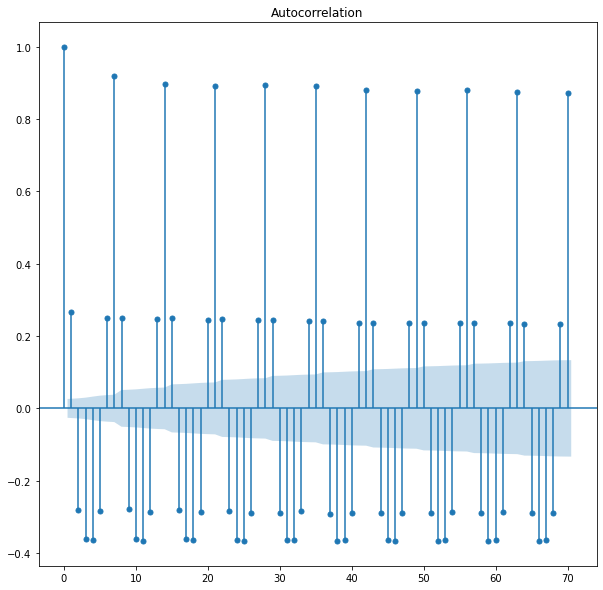

In [175]:
#ACF, daily, 10 weeks of lags

plt.rcParams['figure.figsize'] = (10,10)
plot_acf(pp_daily_waste, lags = 7*10)
plt.show()

# Descriptive analysis monthly data

The aim of this Chapter is to gain a general perspective on the monthly data.


I)  First of all aggregated the Load Weight of waste per person on a monthly level
  
II) We were visualizing the sum of the monthly Load Weight of waste per Person in a lineplot to gain first insights 
    on the data.
    
III) In the next step, we decomposed the timeseries (monthly data). 

   The first plot depicts the actual time series data. 

   In the second plot, we can analyse the trend of the data. From 2006 to 2008 we can observe a slight increase in    Load Weight per person. For the time period from 2008-2019 we can observe a steady decrease. From 2020-2021,        the Load Weight per person is increasing sharply. 

   The third plot shows the seasonality. The seasonal effects are very strong (positive) in the beginning of each      year. There is a second peak in the middle of each year.

   In the fourth plot, we can observe the distribution of the residuals. There are no specific patterns observable    within that plot. 


IV) We applied a Dickey-Fuller-Test in order to test, if the data is stationary. As the p-value is < 0.05, we can  
    assume that the time series data is stationary on a 5% signficance level. 


In [132]:
# I) Transform into monthly
pp_waste = m_waste['Load Weight pp'].resample('m').agg(['sum'])

<AxesSubplot:xlabel='Load Time'>

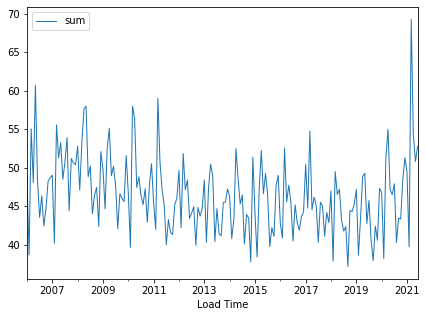

In [133]:
# II) Line Plot
plt.rcParams['figure.figsize'] = (7,5)
pp_waste.plot(linewidth = 1)

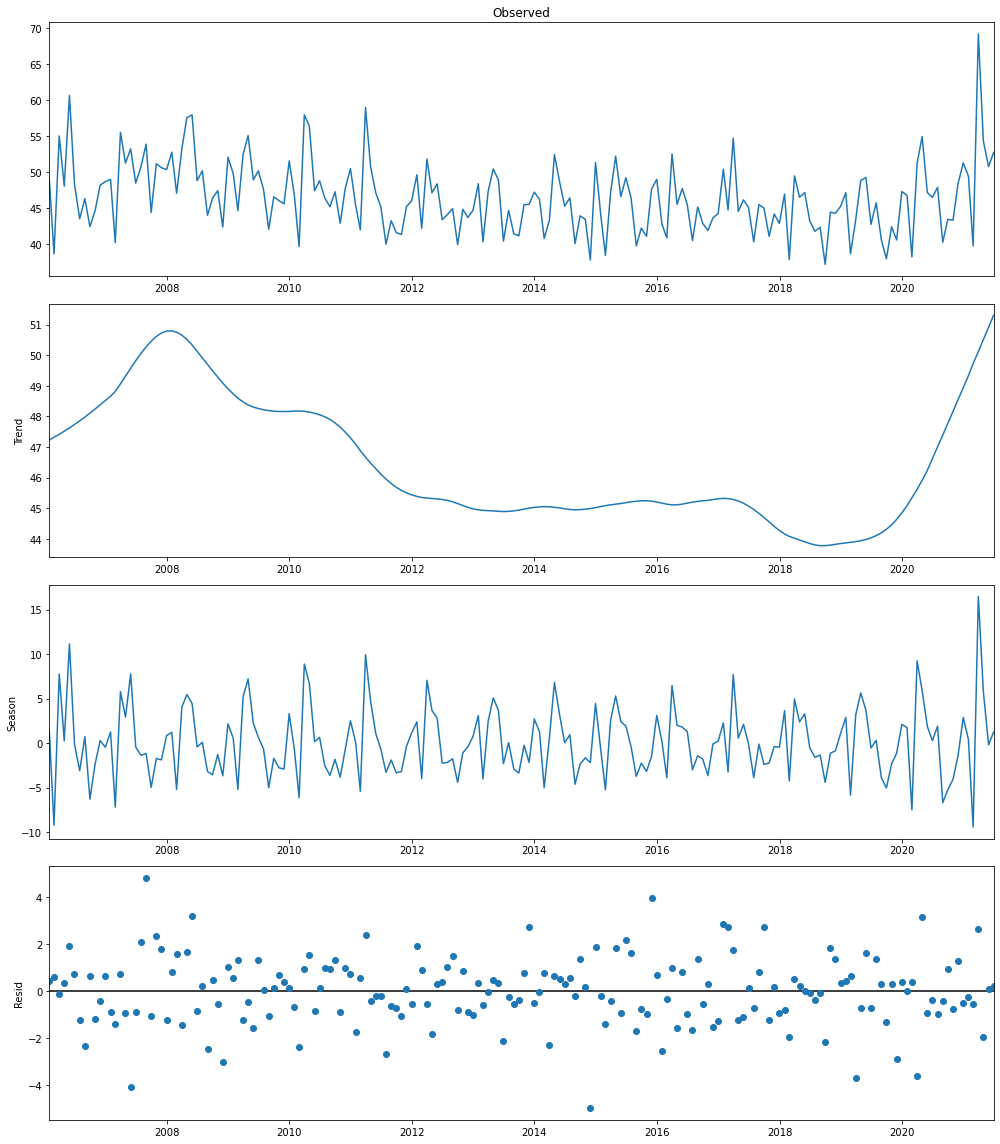

In [134]:
# III) Decomposition

plt.rcParams['figure.figsize'] = (14,16)
stl_waste = smts.STL(pp_waste, seasonal = 5).fit()
stl_waste.plot()
plt.show()


# Transformation of the monthly data

The aim of this chapter is to transform the monthly data by removing the seasonal effects and the trend. In order to see, if our steps of transformation are successfull, we are going to applying a Dickey-Fuller-Test after every transformation. In the end of this chapter, we are going to sum up our findings

I)  Dickey-Fuller-Test on untransformed data

II) Removal of the seasonal component

II) Removal of the Trend

III) Conclusion


In [135]:
result = adfuller(pp_waste['sum'].dropna())

print("Test statistic = {:.4f}".format(result[0]))
print("P-value = {:.4f}".format(result[1]))

# Result p-value > 0.01. Hence there is not enought evidence to reject that the data is not stationarity



Test statistic = -1.1515
P-value = 0.6941


In [136]:
# I) Removal of the seasonal component

pp_waste['sum diff 12'] = pp_waste['sum'].diff(periods = 12)

result = adfuller(pp_waste['sum diff 12'].dropna())

print("Test statistic = {:.4f}".format(result[0]))
print("P-value = {:.4f}".format(result[1]))

# Result p-value > 0.01. After removing the seasonal component, there is not enough evidence
# to rejet the H0 on a 1% level of significance. It has to be assumed that the data is not stationary 


Test statistic = -3.0274
P-value = 0.0324


<AxesSubplot:xlabel='Load Time'>

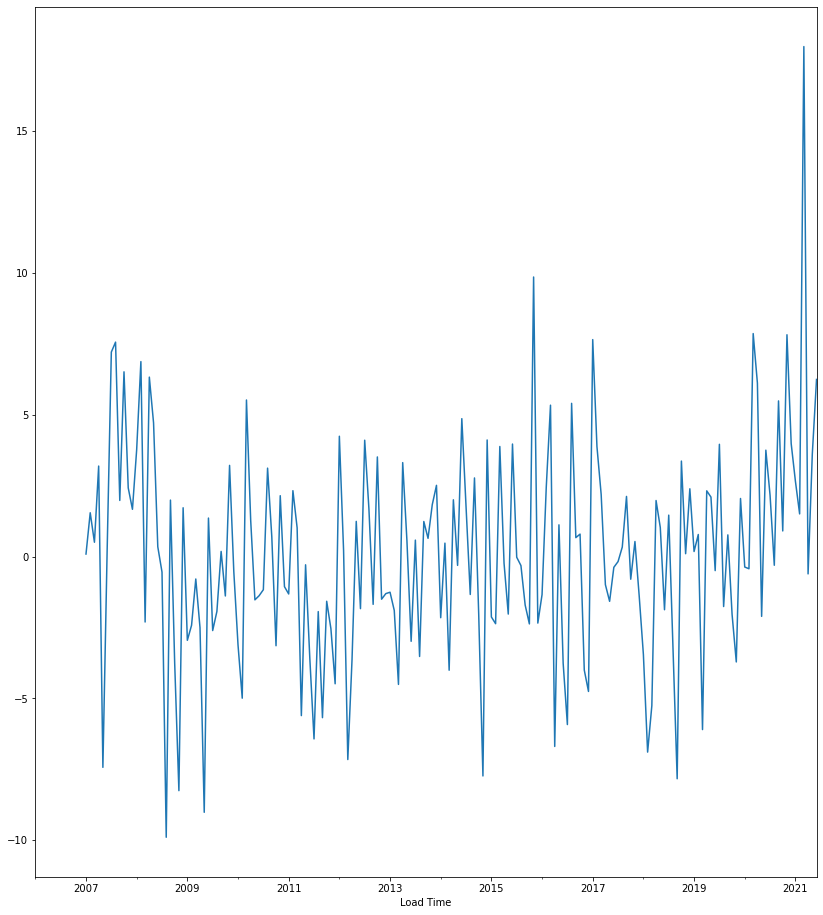

In [137]:
pp_waste['sum diff 12'].plot()

In [138]:
# II) Remove the trend with log and first differences

pp_waste['sum_log'] = np.log(pp_waste['sum'])

pp_waste['sum_log_diff'] = pp_waste['sum_log'].diff(periods=1)

result = adfuller(pp_waste['sum_log_diff'].dropna())

print("Test statistic = {:.4f}".format(result[0]))
print("P-value = {:.4f}".format(result[1]))


# Result p-value < 0.01. After removing the trend component, there is enough evidence
# to rejet the H0 on a 1% level of significance and accept the H1.
#The data does not have a unit root and is stationary.



Test statistic = -4.8270
P-value = 0.0000


,sum,sum diff 12,sum_log,sum_log_diff,Load Weight trans
Load Time,,,,,
2006-01-31,48.935382,NaN,3.890501,NaN,NaN
2006-02-28,38.672231,NaN,3.655122,-0.235379,-0.235379
2006-03-31,55.052177,NaN,4.008281,0.353160,0.353160
2006-04-30,48.093367,NaN,3.873144,-0.135137,-0.135137
2006-05-31,60.692428,NaN,4.105819,0.232675,0.232675


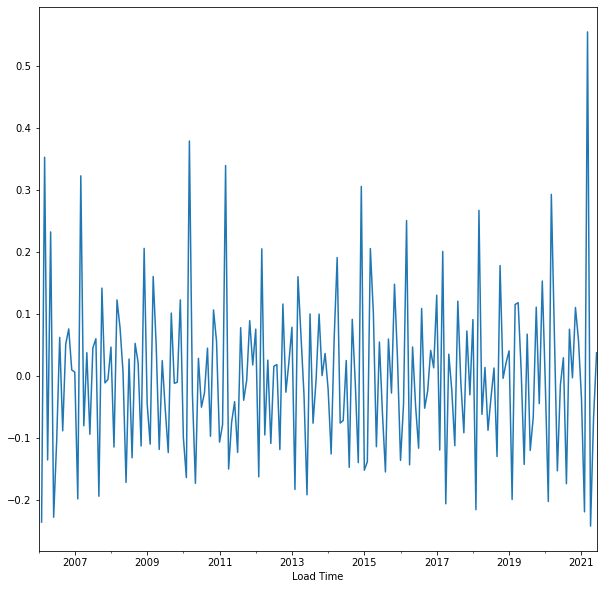

In [155]:
pp_waste['sum_log_diff'].plot()


Conclusion of this chapter

After removing the seasonal component and the trend component, we were able to achive stationarity of the data. 
There is no systematic change in the mean, variance, and no systematic fluctuation anymore. 

As we made sure to remove any trend within the data, we can now focus on performing a autocorrelation function within the next chapter.



# Autokorrelation and partial autocorrelation of the monthly data

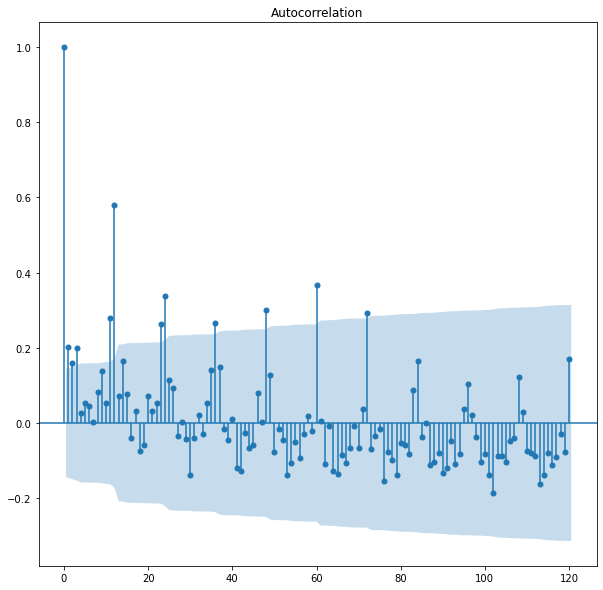

In [168]:
# I) Autocorrelation Function (ACF)

plt.rcParams['figure.figsize'] = (10,10)
plot_acf(pp_waste['sum'], lags = 12*10)
plt.show()

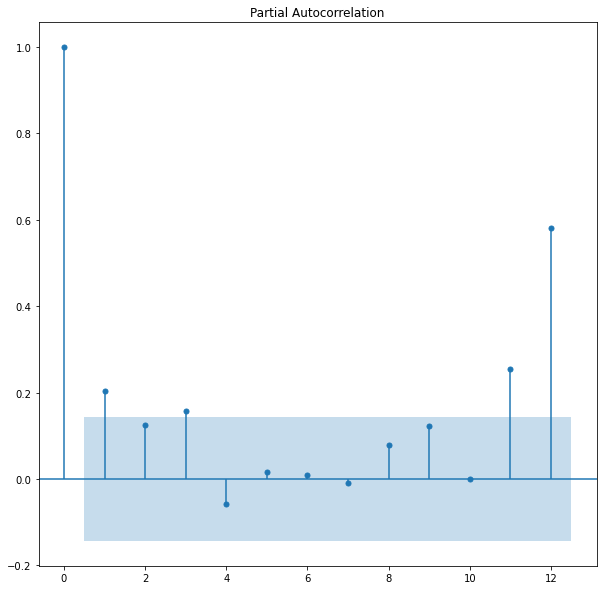

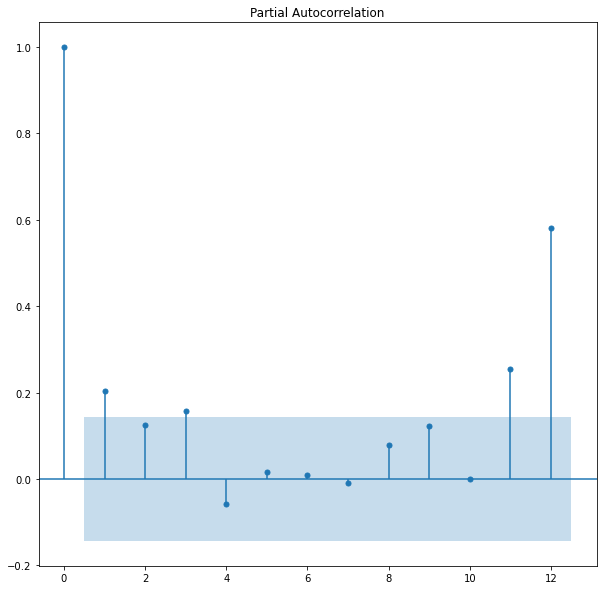

In [170]:
# II) Partial Autocorrelation Function


plt.rcParams['figure.figsize'] = (10,10)
plot_pacf(pp_waste['sum'],lags = 12)


